In [1]:
print('Hell0')

Hell0


In [ ]:
!pip install pandas numpy scikit-learn matplotlib


In [4]:
!pip install pandas

In [2]:
!pip install matplotlib


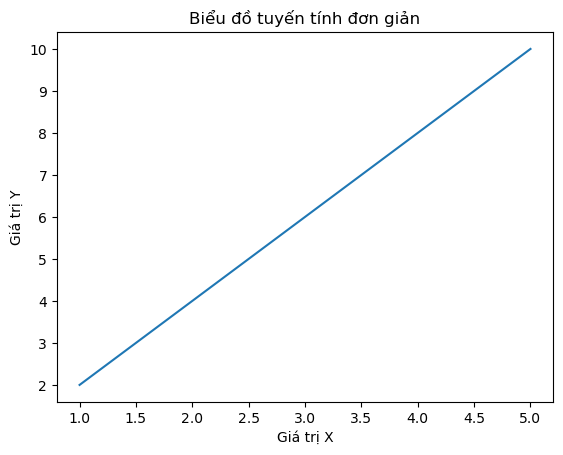

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# Vẽ biểu đồ
plt.plot(x, y)

# Thêm tiêu đề và nhãn trục
plt.title("Biểu đồ tuyến tính đơn giản")
plt.xlabel("Giá trị X")
plt.ylabel("Giá trị Y")

# Hiển thị biểu đồ
plt.show()

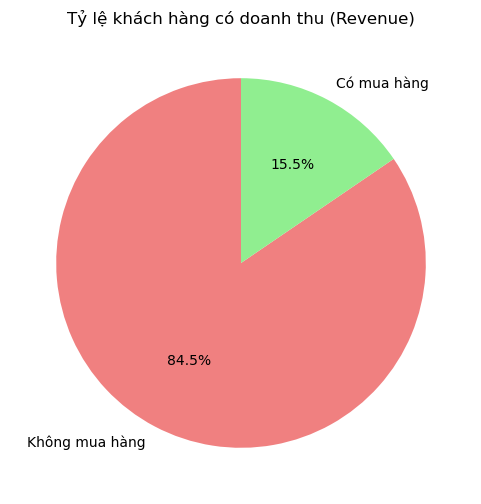

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Đọc dữ liệu
data = pd.read_csv("TTNT\online_shoppers_intention.csv")

# 2️⃣ Đếm số lượng khách hàng có và không có doanh thu
revenue_counts = data['Revenue'].value_counts()

# 3️⃣ Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(
    revenue_counts,
    labels=['Không mua hàng', 'Có mua hàng'],
    autopct='%1.1f%%',      # hiển thị % làm tròn 1 chữ số
    startangle=90,          # xoay để biểu đồ nhìn dễ hơn
    colors=['lightcoral', 'lightgreen']  # màu sắc
)

# 4️⃣ Thêm tiêu đề
plt.title("Tỷ lệ khách hàng có doanh thu (Revenue)")

# 5️⃣ Hiển thị biểu đồ
plt.show()


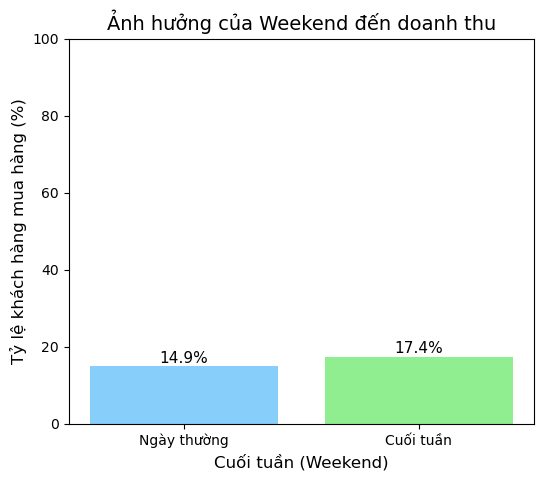

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Đọc dữ liệu từ file CSV
data = pd.read_csv("TTNT\online_shoppers_intention.csv")

# 2️⃣ Tính tỷ lệ khách hàng mua hàng (%) theo Weekend
# Weekend = True (cuối tuần), False (ngày thường)
weekend_revenue = data.groupby('Weekend')['Revenue'].mean() * 100

# 3️⃣ Vẽ biểu đồ cột
plt.figure(figsize=(6, 5))
plt.bar(
    weekend_revenue.index.astype(str),  # Chuyển True/False thành chuỗi để hiển thị
    weekend_revenue,
    color=['lightskyblue', 'lightgreen']
)

# 4️⃣ Thêm tiêu đề, nhãn trục và tỷ lệ
plt.title("Ảnh hưởng của Weekend đến doanh thu", fontsize=14)
plt.xlabel("Cuối tuần (Weekend)", fontsize=12)
plt.ylabel("Tỷ lệ khách hàng mua hàng (%)", fontsize=12)
plt.xticks([0, 1], ['Ngày thường', 'Cuối tuần'])
plt.ylim(0, 100)  # Giới hạn trục Y từ 0 đến 100 (%)

# 5️⃣ Hiển thị giá trị phần trăm trên đầu cột
for i, v in enumerate(weekend_revenue):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=11)

# 6️⃣ Hiển thị biểu đồ
plt.show()


# các thao tác thường gặp trong NumPy
# Nhóm thao tác	Ví dụ	Giải thích
# 🧮 Tạo mảng	np.array([1,2,3]), np.arange(0,10,2)	Tạo nhanh mảng số học
# 🔢 Thống kê	np.mean(x), np.std(x), np.sum(x)	Trung bình, độ lệch chuẩn, tổng
# ➗ Toán học	x + y, x * y, np.sqrt(x)	Phép toán vector/matrix
# 📐 Đại số tuyến tính	np.dot(A, B), np.linalg.inv(A)	Nhân ma trận, nghịch đảo, định thức
# 🎲 Random	np.random.rand(10), np.random.randint(1,100,5)	Sinh số ngẫu nhiên
# 📏 Định dạng mảng	x.reshape(2,3), x.T	Thay đổi kích thước, chuyển vị

In [7]:
import numpy as np

data = np.array([2, 4, 6, 8, 10])

print("Trung bình:", np.mean(data))
print("Độ lệch chuẩn:", np.std(data))
print("Tổng:", np.sum(data))
print("Giá trị lớn nhất:", np.max(data))


Trung bình: 6.0
Độ lệch chuẩn: 2.8284271247461903
Tổng: 30
Giá trị lớn nhất: 10


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path

data_path = Path("TTNT\online_shoppers_intention.csv")
df = pd.read_csv(data_path)
# Tách X, y
X = df.drop(columns=["Revenue"])
y = df["Revenue"].astype(int)

# One-hot encoding cho cột chuỗi
X = pd.get_dummies(X, drop_first=True)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

# Khởi tạo mô hình KNN
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Dự đoán
y_pred = knn.predict(X_test)

# Đánh giá
print("Accuracy:", accuracy_score(y_test, y_pred))

# Quan sát k nào cho accuracy cao nhất rồi chọn.
# for k in range(1, 20):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train, y_train)
#     y_pred = knn.predict(X_test)
#     print(f"k={k}, accuracy={accuracy_score(y_test, y_pred):.4f}")

    
print(classification_report(y_test, y_pred))

Accuracy: 0.8686131386861314
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2084
           1       0.66      0.32      0.43       382

    accuracy                           0.87      2466
   macro avg       0.77      0.64      0.68      2466
weighted avg       0.85      0.87      0.85      2466



a (intercept): 68.39999999999999
b (slope): [6.6]
Chiều cao dự đoán: 134.39999999999998


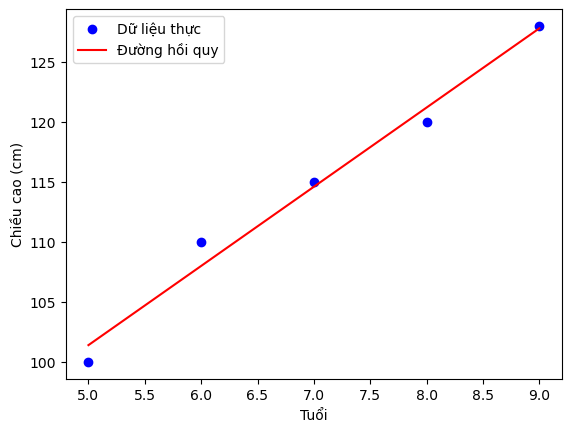

In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Dữ liệu mẫu
X = [[5], [6], [7], [8], [9]]
y = [100, 110, 115, 120, 128]

# Huấn luyện mô hình
model = LinearRegression()
model.fit(X, y)

# Hệ số và intercept
print("a (intercept):", model.intercept_)
print("b (slope):", model.coef_)

# Dự đoán chiều cao cho tuổi 10
y_pred = model.predict([[10]])
print("Chiều cao dự đoán:", y_pred[0])

# Vẽ biểu đồ
plt.scatter(X, y, color='blue', label='Dữ liệu thực')
plt.plot(X, model.predict(X), color='red', label='Đường hồi quy')
plt.xlabel("Tuổi")
plt.ylabel("Chiều cao (cm)")
plt.legend()
plt.show()


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, roc_auc_score
from pathlib import Path
import numpy as np

# File path (điều chỉnh nếu cần)
data_path = Path("TTNT/online_shoppers_intention.csv")  # hoặc "TTNT\\online_shoppers_intention.csv"
df = pd.read_csv(data_path)

# Tách X, y
X = df.drop(columns=["Revenue"])
y = df["Revenue"].astype(int)

# One-hot encoding cho cột chuỗi
X = pd.get_dummies(X, drop_first=True)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y, shuffle=True
)

# Khởi tạo mô hình Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Dự đoán (giá trị liên tục)
y_pred_cont = lr.predict(X_test)

# Các chỉ số hồi quy (tham khảo)
mse = mean_squared_error(y_test, y_pred_cont)
rmse = np.sqrt(mse)
print(f"Regression metrics on test set: MSE = {mse:.4f}, RMSE = {rmse:.4f}")

# Chuyển dự đoán liên tục về nhãn dùng threshold 0.5
threshold = 0.5
y_pred_label = (y_pred_cont >= threshold).astype(int)

# Đánh giá phân loại
print("Classification metrics (threshold = 0.5):")
print("Accuracy:", accuracy_score(y_test, y_pred_label))
print(classification_report(y_test, y_pred_label, digits=4))

# ROC-AUC (dùng dự đoán liên tục như "scores")
try:
    auc = roc_auc_score(y_test, y_pred_cont)
    print(f"ROC AUC (using continuous predictions): {auc:.4f}")
except Exception as e:
    print("Không tính được ROC AUC:", e)

# Nếu muốn thử các threshold khác để tối ưu F1/Accuracy, ví dụ:
# thresholds = np.linspace(0.01, 0.99, 99)
# best_acc = 0
# best_t = 0.5
# for t in thresholds:
#     y_t = (y_pred_cont >= t).astype(int)
#     acc = accuracy_score(y_test, y_t)
#     if acc > best_acc:
#         best_acc = acc
#         best_t = t
# print("Best threshold by accuracy:", best_t, "->", best_acc)


Regression metrics on test set: MSE = 0.0971, RMSE = 0.3116
Classification metrics (threshold = 0.5):
Accuracy: 0.8710462287104623
              precision    recall  f1-score   support

           0     0.8742    0.9899    0.9284      2084
           1     0.8019    0.2225    0.3484       382

    accuracy                         0.8710      2466
   macro avg     0.8380    0.6062    0.6384      2466
weighted avg     0.8630    0.8710    0.8386      2466

ROC AUC (using continuous predictions): 0.8981


# Đây là 2 model luôn là SVM ( vector support) và liner

In [13]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, classification_report, mean_squared_error,
    roc_auc_score, confusion_matrix
)

# --- 1. Load data ---
data_path = Path("TTNT/online_shoppers_intention.csv")  # điều chỉnh đường dẫn nếu cần
df = pd.read_csv(data_path)

# --- 2. Features / target ---
X = df.drop(columns=["Revenue"])
y = df["Revenue"].astype(int)

# One-hot encoding cho các cột object
X = pd.get_dummies(X, drop_first=True)

# --- 3. Scale ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 4. Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y, shuffle=True
)

# ---------------------------
# MODEL 1: Linear Regression (baseline)
# ---------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)

# Dự đoán giá trị liên tục
y_pred_cont_lr = lr.predict(X_test)

# Metrics hồi quy tham khảo
mse_lr = mean_squared_error(y_test, y_pred_cont_lr)
rmse_lr = np.sqrt(mse_lr)
print("LinearRegression (regression) - MSE: {:.4f}, RMSE: {:.4f}".format(mse_lr, rmse_lr))

# Chuyển về nhãn bằng threshold 0.5
threshold = 0.5
y_pred_lbl_lr = (y_pred_cont_lr >= threshold).astype(int)

print("\nLinearRegression (as classifier) - classification report (threshold=0.5):")
print("Accuracy:", accuracy_score(y_test, y_pred_lbl_lr))
print(classification_report(y_test, y_pred_lbl_lr, digits=4))

# ROC AUC using continuous predictions
try:
    auc_lr = roc_auc_score(y_test, y_pred_cont_lr)
    print("LinearRegression ROC AUC (using continuous preds): {:.4f}".format(auc_lr))
except Exception as e:
    print("Cannot compute ROC AUC for LinearRegression:", e)

# ---------------------------
# MODEL 2: Support Vector Machine (SVM)
# ---------------------------
# Basic SVM with probability enabled so we can compute ROC AUC
svc = SVC(probability=True, random_state=42)

# Optional: Grid search to tune C and kernel
param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["rbf", "linear"],
    # "gamma": ["scale", "auto"]  # để thêm nếu dùng kernel='rbf'
}
grid = GridSearchCV(svc, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

best_svc = grid.best_estimator_
print("\nSVM best params:", grid.best_params_)
print("SVM CV best score (accuracy): {:.4f}".format(grid.best_score_))

# Predict labels and probabilities
y_pred_lbl_svc = best_svc.predict(X_test)
y_pred_prob_svc = best_svc.predict_proba(X_test)[:, 1]

print("\nSVM - classification report:")
print("Accuracy:", accuracy_score(y_test, y_pred_lbl_svc))
print(classification_report(y_test, y_pred_lbl_svc, digits=4))

# ROC AUC for SVM
try:
    auc_svc = roc_auc_score(y_test, y_pred_prob_svc)
    print("SVM ROC AUC: {:.4f}".format(auc_svc))
except Exception as e:
    print("Cannot compute ROC AUC for SVM:", e)

# Confusion matrices (tùy chọn)
print("\nConfusion matrix - LinearRegression (threshold=0.5):")
print(confusion_matrix(y_test, y_pred_lbl_lr))
print("\nConfusion matrix - SVM:")
print(confusion_matrix(y_test, y_pred_lbl_svc))

# ---------------------------
# Optional: Sweep thresholds for LinearRegression to maximize e.g. F1 or Accuracy
# ---------------------------
from sklearn.metrics import f1_score
best_t = 0.5
best_f1 = f1_score(y_test, y_pred_lbl_lr)
for t in np.linspace(0.01, 0.99, 99):
    y_t = (y_pred_cont_lr >= t).astype(int)
    f1 = f1_score(y_test, y_t)
    if f1 > best_f1:
        best_f1 = f1
        best_t = t

print("\nBest threshold for LinearRegression by F1: {:.2f} -> F1 = {:.4f}".format(best_t, best_f1))


LinearRegression (regression) - MSE: 0.0971, RMSE: 0.3116

LinearRegression (as classifier) - classification report (threshold=0.5):
Accuracy: 0.8710462287104623
              precision    recall  f1-score   support

           0     0.8742    0.9899    0.9284      2084
           1     0.8019    0.2225    0.3484       382

    accuracy                         0.8710      2466
   macro avg     0.8380    0.6062    0.6384      2466
weighted avg     0.8630    0.8710    0.8386      2466

LinearRegression ROC AUC (using continuous preds): 0.8981
Fitting 5 folds for each of 6 candidates, totalling 30 fits

SVM best params: {'C': 10, 'kernel': 'rbf'}
SVM CV best score (accuracy): 0.8960

SVM - classification report:
Accuracy: 0.8848337388483374
              precision    recall  f1-score   support

           0     0.9110    0.9573    0.9336      2084
           1     0.6775    0.4895    0.5684       382

    accuracy                         0.8848      2466
   macro avg     0.7942    0.7234 

🧮 2. Giảm accuracy từ 0.87 xuống khoảng 0.80
Thử các ngưỡng khác và chọn threshold cho accuracy mong muốn:

In [14]:
# --- Tìm threshold có accuracy mong muốn ---
desired_accuracy = 0.80  # ví dụ muốn accuracy ≈ 80%

thresholds = np.linspace(0.01, 0.99, 99)
acc_scores = []

for t in thresholds:
    y_t = (y_pred_cont >= t).astype(int)
    acc = accuracy_score(y_test, y_t)
    acc_scores.append(acc)

# Tìm threshold gần nhất với độ chính xác mong muốn
closest_idx = np.argmin(np.abs(np.array(acc_scores) - desired_accuracy))
best_t = thresholds[closest_idx]
best_acc = acc_scores[closest_idx]

print(f"\nNgưỡng threshold gần nhất cho accuracy ~ {desired_accuracy*100:.1f}%:")
print(f"Threshold = {best_t:.3f}, Accuracy = {best_acc*100:.2f}%")

# Kiểm tra lại classification report tại ngưỡng đó
y_best = (y_pred_cont >= best_t).astype(int)
print("\nClassification report tại threshold mới:")
print(classification_report(y_test, y_best, digits=4))



Ngưỡng threshold gần nhất cho accuracy ~ 80.0%:
Threshold = 0.170, Accuracy = 79.52%

Classification report tại threshold mới:
              precision    recall  f1-score   support

           0     0.9603    0.7903    0.8671      2084
           1     0.4181    0.8220    0.5543       382

    accuracy                         0.7952      2466
   macro avg     0.6892    0.8061    0.7107      2466
weighted avg     0.8764    0.7952    0.8186      2466



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Dữ liệu giả lập: học bao nhiêu giờ -> đậu (1) / rớt (0)
X = [[1], [2], [3], [4], [5], [6]]
y = [0, 0, 0, 1, 1, 1]

# Chuẩn hóa (tốt cho Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Huấn luyện mô hình Logistic Regression
log_model = LinearRegression()

log_model.fit(X, y)

print(log_model.fit(X, y)
.predict([[3.5]])) 
# log_model.fit(X_train, y_train)

# # Dự đoán
# y_pred = log_model.predict(X_test)

# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

# # Dự đoán xác suất
# print("Xác suất dự đoán:", log_model.predict_proba(X_test))

[0.5]


🎯 SVM là gì?

SVM (Support Vector Machine) là mô hình phân loại (classification)
giúp tìm ra một đường (hoặc mặt phẳng) tốt nhất để phân tách các nhóm dữ liệu khác nhau.

⚙️ Ý tưởng cốt lõi:

SVM tìm đường biên (hyperplane) chia dữ liệu thành 2 lớp sao cho:

Hai lớp được phân tách rõ nhất có thể

Khoảng cách (margin) giữa đường biên và các điểm gần nhất của mỗi lớp là lớn nhất

📊 Mục tiêu của SVM:

“Tìm đường phân cách có biên rộng nhất giữa hai lớp dữ liệu.”

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Dữ liệu mẫu
X = [[1], [2], [3], [4], [5], [6]]
y = [0, 0, 0, 1, 1, 1]

# Khởi tạo mô hình SVM
model = svm.SVC(kernel='linear')
model.fit(X, y)

# Dự đoán
print("Dự đoán điểm 3.5 thuộc lớp:", model.predict([[3.3]])[0])
print("Độ chính xác:", accuracy_score(y, model.predict(X)))


Dự đoán điểm 3.5 thuộc lớp: 0
Độ chính xác: 1.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

shoping= pd.read_csv("TTNT/online_shoppers_intention.csv")

shoping.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [14]:
def select_features(df, features_name):
    return df[features_name].values

def select_target(df, target_name):
    return df[target_name].values

In [48]:
features = select_features(shoping, ["PageValues","ProductRelated_Duration", "ProductRelated", "BounceRates","SpecialDay","Region"])
target = select_target(shoping, ["Revenue"]).astype(int)

In [21]:
target

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

# TRAIN DỮ LIỆU

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=True)


In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


# model = KNeighborsClassifier(n_neighbors=7)
model = LogisticRegression()


# model = LinearRegression()

model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(train_score)
print(test_score)

0.8798661800486618
0.8844282238442822


d:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
from sklearn.metrics import accuracy_score
# Dự đoán
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8844282238442822
